1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


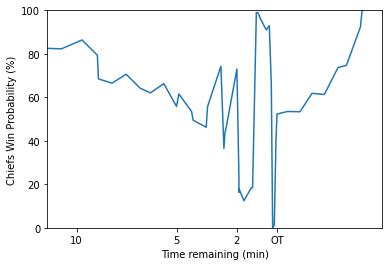

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Classes import Simulation_Team
from Simulate import simulate

# Initialize teams
road = "Chiefs"
home = "Bengals"
road_team = Simulation_Team(road, year="2021 ")
home_team = Simulation_Team(home, year="2021 ")
road_team.create_players_data()
home_team.create_players_data()

initial_variables_game_sheet = "Base/Excel Files/Initial Variables Template.xlsx"
s = pd.ExcelFile(initial_variables_game_sheet).parse("Sheet1") # Get sheet of initial variables at each down in the game
initial_variables_list = list()

# Transform sheet into list of dictionaries, with each element in the list representing a dictionary of initial variables at each down
for i in range(0, len(list(s["t"]))):
    initial_variables_list.append({"t": s["t"][i], "down": s["down"][i], "distance": s["distance"][i], "yards_to_endzone": s["yards_to_endzone"][i], "ko_team": s["ko_team"][i], "team_in_poss": s["team_in_poss"][i], "opposition": s["opposition"][i], "road_team_timeouts": s["road_team_timeouts"][i], "home_team_timeouts": s["home_team_timeouts"][i], "road_team_points": s["road_team_points"][i], "home_team_points": s["home_team_points"][i], "clock_running": s["clock_running"][i], "td_play": s["td_play"][i], "kickoff": s["kickoff"][i], "safety_kick": s["safety_kick"][i], "hurry_up": s["hurry_up"][i], "overtime": s["overtime"][i], "sudden_death": s["sudden_death"][i]})
    if initial_variables_list[i]["ko_team"] == home_team.name:
        initial_variables_list[i]["ko_team"] = home_team
    else:
        initial_variables_list[i]["ko_team"] = road_team
    if initial_variables_list[i]["team_in_poss"] == home_team.name:
        initial_variables_list[i]["team_in_poss"] = home_team
        initial_variables_list[i]["opposition"] = road_team
    else:
        initial_variables_list[i]["team_in_poss"] = road_team
        initial_variables_list[i]["opposition"] = home_team
win_probs = list() # List of win probabilities for the eventual winning team at each down (y-axis values for the graph)
times = list() # Corresponding times 
n = 1000 # Number of times to simulate the game at each down
j = 0
t = 0
overtime = False

# Updating win_probs and times list for each down
for I in initial_variables_list: # Loop through each down
    j += 1
    print(j)
    overtime = True if I["overtime"] == "Y" else False
    if overtime == True:
        t = 3600 + (600 - I["t"])
    else:
        t = 3600 - I["t"]
    times.append(t)
    for i in range(0, n):
        simulate(road_team, home_team, initial_variables=I)
        road_team.update_all_games_or_season_stats(home_team, "games")
        home_team.update_all_games_or_season_stats(road_team, "games")
        road_team.reset_game_or_season_stats("game")
        home_team.reset_game_or_season_stats("game")
    win_probs.append(round(100 * home_team.record[0] / n, 2))
    home_team.record = [0, 0, 0]
    road_team.record = [0, 0, 0]
times = np.array(times) / 60 # Change times to minutes
fig = plt.figure()
ax = plt.axes()
plt.plot(times, win_probs) # Plot graph
if times[-1] != 60: # Game went to overtime
    plt.vlines([15, 30, 45, 60], 0, 100, linestyle="dashed") # Adding vertical lines at beginning of each quarter, excluding kickoff
    plt.xticks([15, 30, 45, 60], ["Q2", "HALF", "Q4", "OT"]) # Adding labels to X axis
else:
    plt.vlines([15, 30, 45], 0, 100, linestyle="dashed") # Adding vertical lines at beginning of each quarter, excluding kickoff
    plt.xticks([15, 30, 45], ["Q2", "HALF", "Q4"])
plt.ylim((0, 100))
plt.xlim((times[0], times[-1] + 1))
plt.ylabel("Bengals Win Probability (%)") 
plt.xlabel("Time elapsed")
plt.savefig("Instagram Posts/Week 17/" + road + " at " + home + " win probability graph.png") # Save graph
plt.show()